In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv('qdrops.csv', parse_dates=True)

In [18]:
df = df.sort_values(by='drop_id')
df = df.set_index('drop_id')

In [40]:
# df['hour'] = pd.to_datetime(df.date).dt.hour
# df['hour_utc'] = pd.to_datetime(df.date).dt.tz_convert("UTC").dt.hour
# df['time_utc'] = pd.to_datetime(df.date).dt.tz_convert("UTC").dt.time
# df['weekday'] = pd.to_datetime(df.date).dt.dayofweek

df['date'] = pd.to_datetime(df.date)

# # Update: Use fractional hours
# df['hour_utc'] += df.date.dt.minute / 60
# df['hour'] += df.date.dt.minute / 60

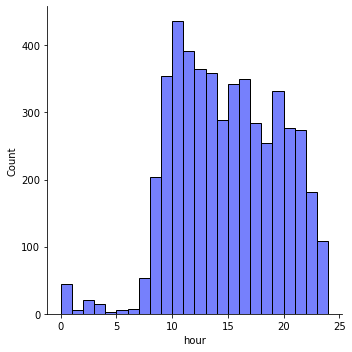

In [20]:
sns.displot(df, x='hour', binwidth=1)

In [21]:
# df['minutes_since_last_drop'] = pd.to_datetime(df.date).diff().dt.total_seconds() / 60
# df['minutes_since_last_drop'] = df.minutes_since_last_drop.replace(0, 0.05)
# df['minutes_since_last_drop_avg'] = df.minutes_since_last_drop.rolling(window=5).mean()
# df['post_length_chars'] = df.body_text.str.len()

In [25]:
posts_within_1_hr = df[df.minutes_since_last_drop <= 60]
posts_within_6_hrs = df[df.minutes_since_last_drop <= 360]
posts_within_30_mins = df[df.minutes_since_last_drop <= 30]

Text(0, 0.5, 'Hour (Pacific)')

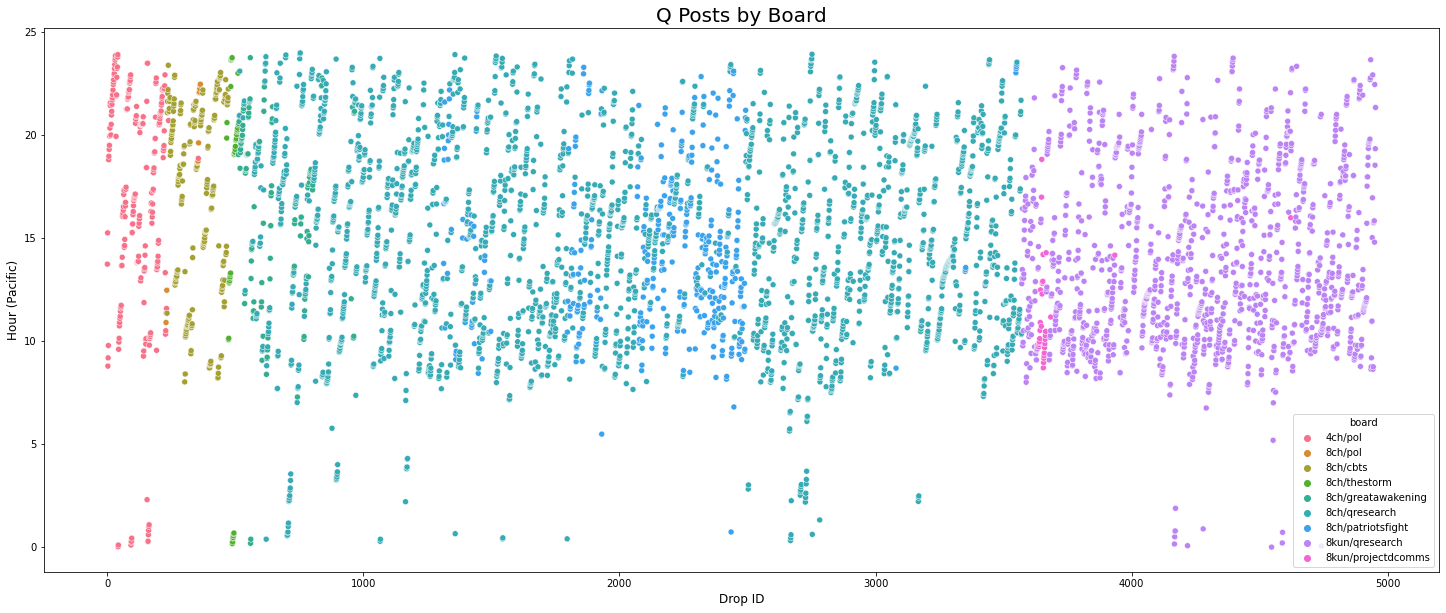

In [26]:
fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(25, 10)

sns.scatterplot(data=df, x='drop_id', y='hour', hue='board').set_title('Q Posts by Board', size=20)
plt.xlabel("Drop ID", size=12)
plt.ylabel("Hour (Pacific)", size=12)

In [27]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# tfidf_vect = TfidfVectorizer(max_df=0.8, min_df=2, stop_words='english')
# doc_term_matrix = tfidf_vect.fit_transform(df.body_text.values.astype('U'))

# from sklearn.decomposition import NMF

# nmf = NMF(n_components=8, random_state=42)
# nmf.fit(doc_term_matrix)

# for i,topic in enumerate(nmf.components_):
#     print(f'Top 10 words for topic #{i}:')
#     print([tfidf_vect.get_feature_names()[i] for i in topic.argsort()[-10:][::-1]])
#     print('\n')


# Output of above:

# Top 10 words for topic #0:
# ['status', 'twitter', 'com', 'https', 'realdonaldtrump', 'vip', 'mobile', 'patriot', 'love', 'flagsout']


# Top 10 words for topic #1:
# ['jpg', 'large', '220px', 'pain', 'anons', 'remember', 'remembering', 'enemy', 'reconcile', 'unknown']


# Top 10 words for topic #2:
# ['png', 'clipboardimage', 'delta', 'shot', 'screen', 'coincidence', 'anon', 'realdonaldtrump', 'united', 'large']


# Top 10 words for topic #3:
# ['youtube', 'watch', 'www', 'https', 'com', 'feature', 'youtu', 'g2qixxafxcq', 'politics', 'html']


# Top 10 words for topic #4:
# ['news', 'potus', 'think', 'people', 'did', 'fake', 'public', 'control', 'fbi', 'www']


# Top 10 words for topic #5:
# ['jpeg', 'coincidence', 'coincidences', 'believe', 'ready', 'patriots', 'game', 'image0', 'news', 'hear']


# Top 10 words for topic #6:
# ['wwg1wga', 'stand', 'united', 'status', 'win', 'wrwy', 'twitter', 'qthewakeup', 'stop', 'great']


# Top 10 words for topic #7:
# ['god', 'patriots', 'bless', 'country', 'stand', 'patriot', 'fight', 'thank', 'united', 'love']

## My best guess at labeling the above topics:

- 0: Twitter link
- 1: JPEG
- 2: PNG
- 3: Youtube video
- 4: Conspiratorial
- 5: Coincidences
- 6: Sloganeering
- 7: Patriotism


In [28]:
# topic_values = nmf.transform(doc_term_matrix)
# topics = pd.DataFrame(topic_values)
# topics.columns = ['Twitter link', 'JPEG', 'PNG', 'Other link', 'Conspiratorial', 'Coincidences', 'Sloganeering', 'Patriotism']
# topics['drop_id'] = topics.index + 1
# topics = topics.set_index('drop_id')
# topics=((topics-topics.min())/(topics.max()-topics.min()))

NameError: name 'nmf' is not defined

In [30]:
# df['topic'] = topics.columns[topic_values.argmax(axis=1)]
topic_twitter = df[df.topic == 'Twitter link']
topic_jpeg = df[df.topic == 'JPEG']
topic_png = df[df.topic == 'PNG']
topic_other = df[df.topic == 'Other link']
topic_conspiratorial = df[df.topic == 'Conspiratorial']
topic_coincidences = df[df.topic == 'Coincidences']
topic_sloganeering = df[df.topic == 'Sloganeering']
topic_patriotism = df[df.topic == 'Patriotism']

/home/robert/.local/lib/python3.9/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/robert/.local/lib/python3.9/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/robert/.local/lib/python3.9/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


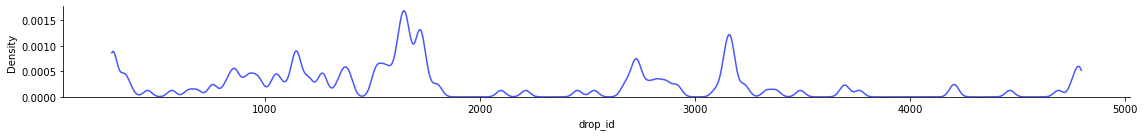

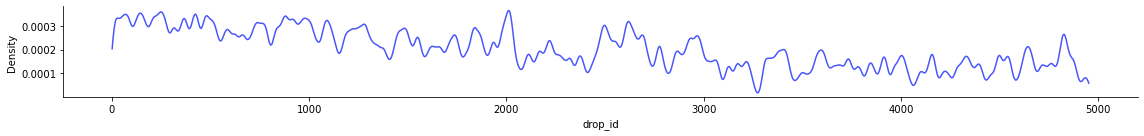

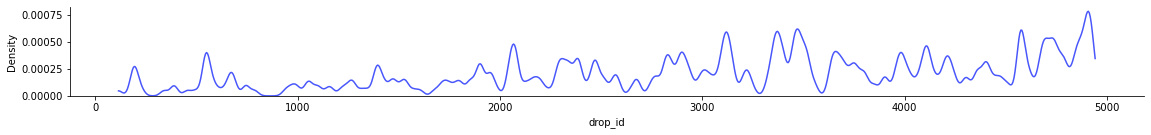

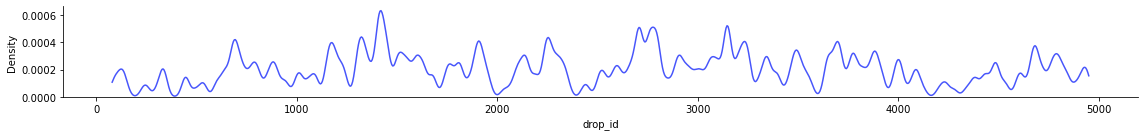

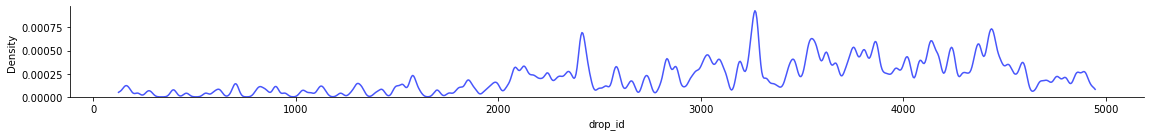

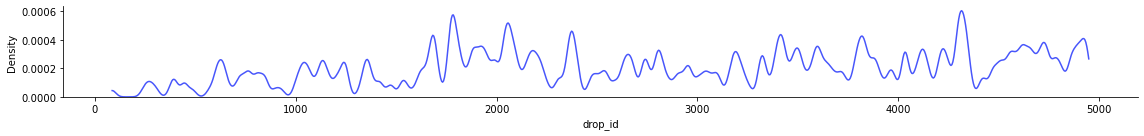

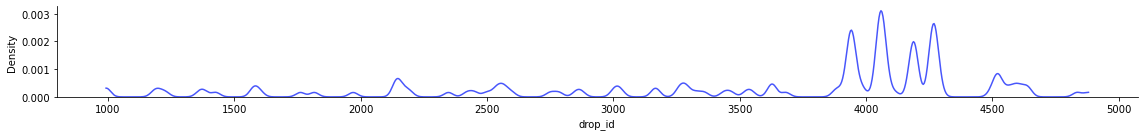

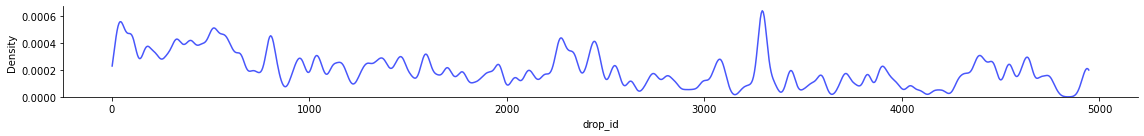

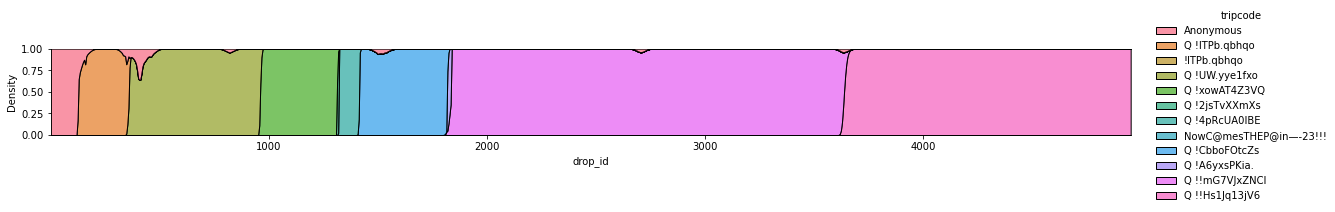

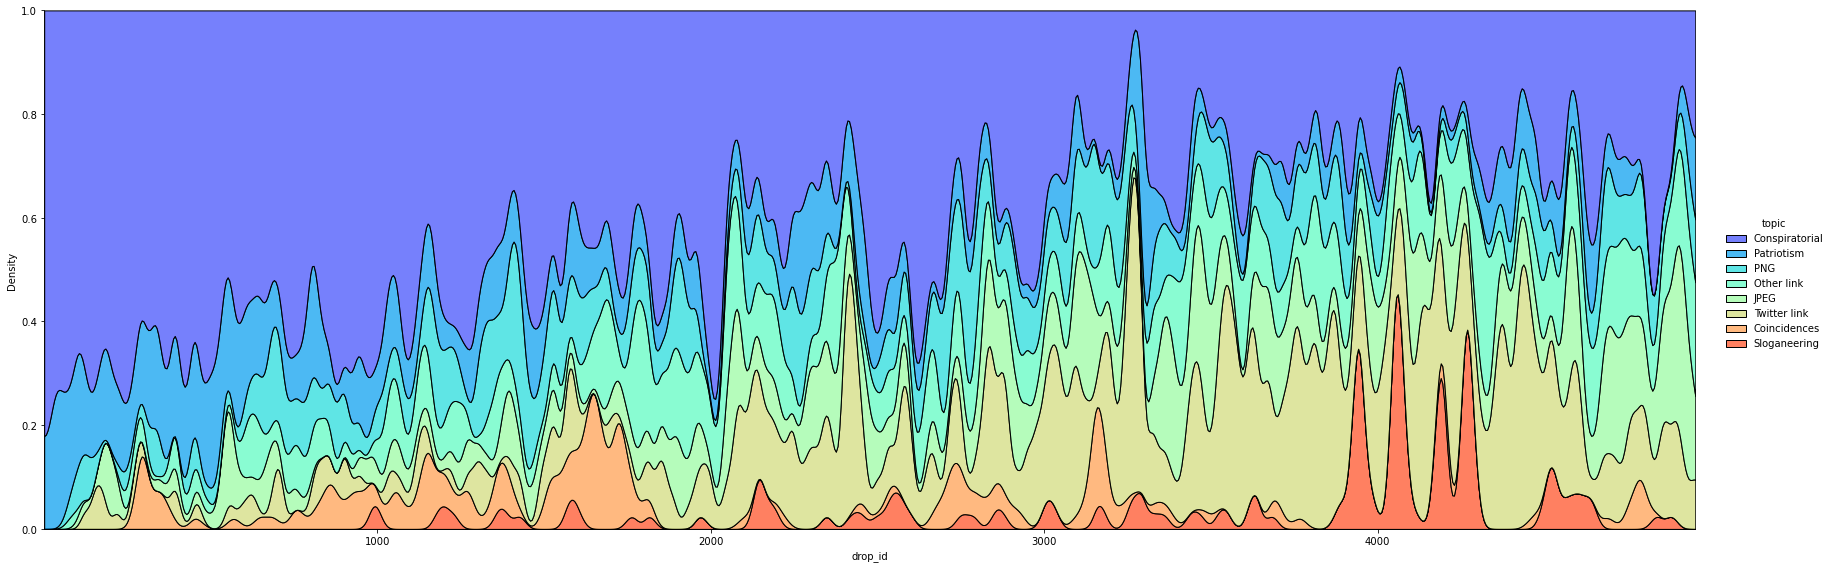

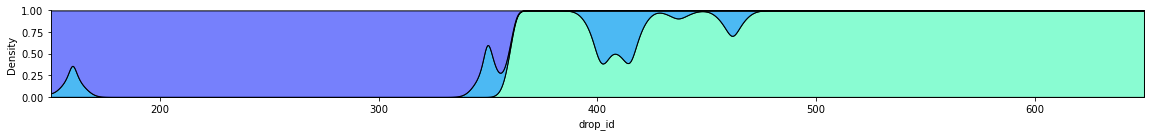

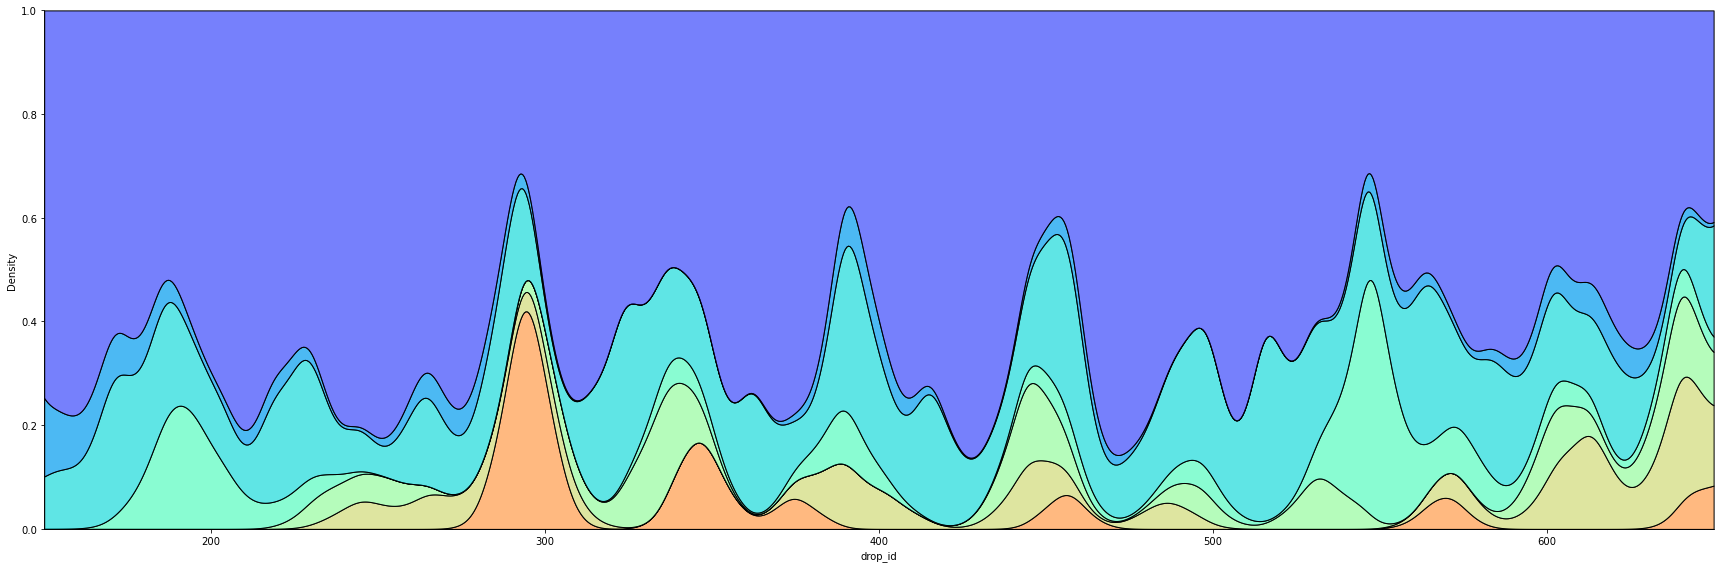

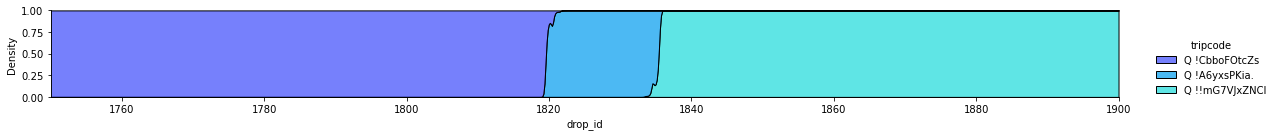

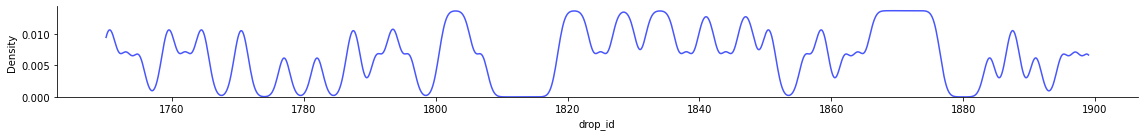

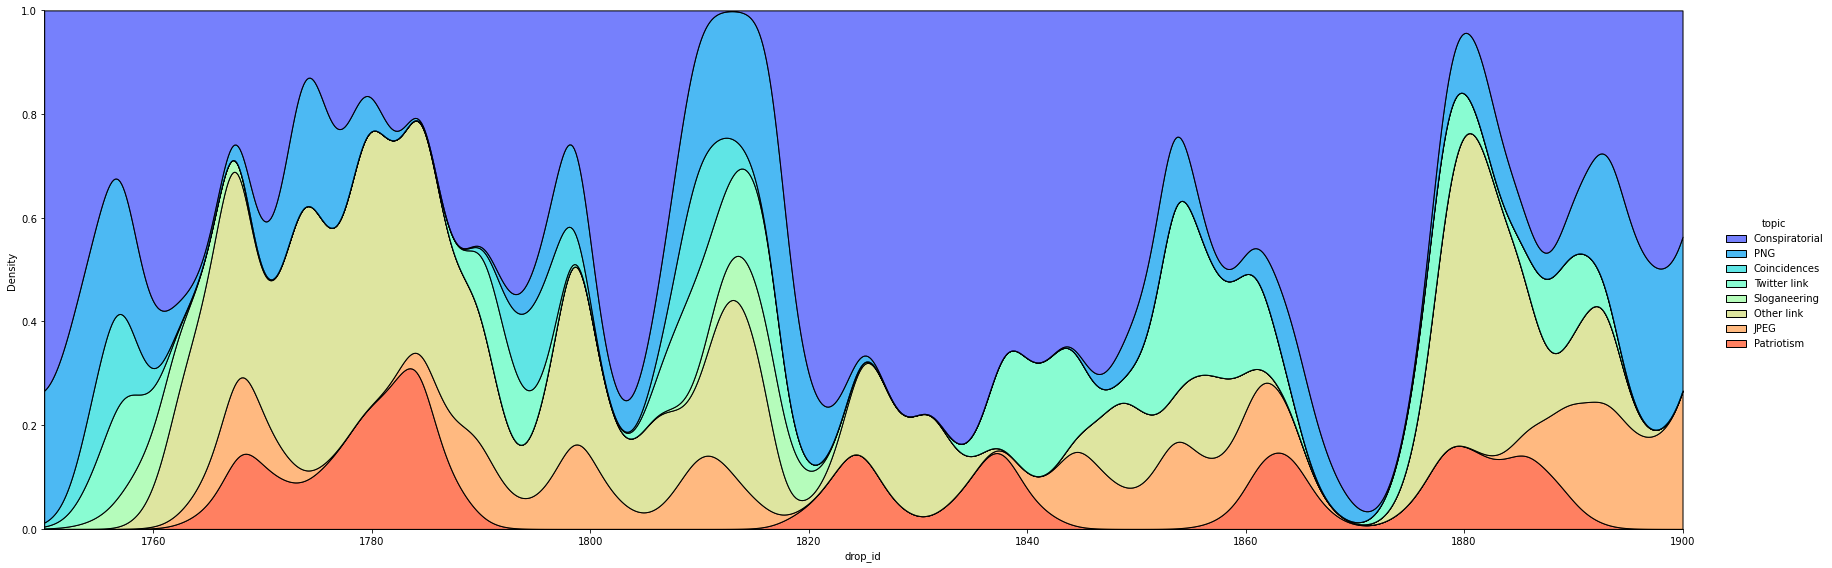

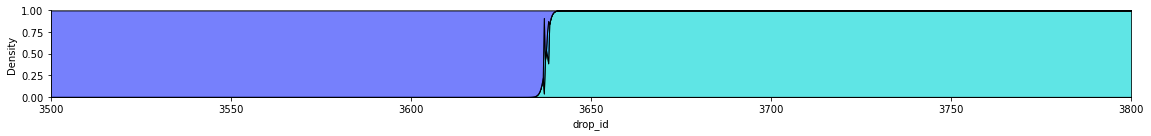

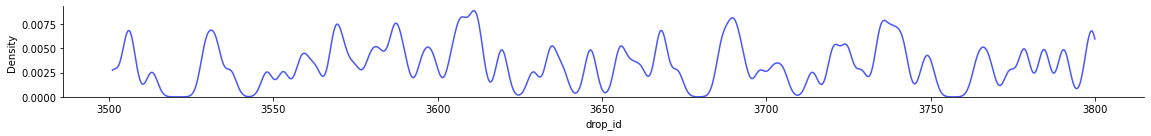

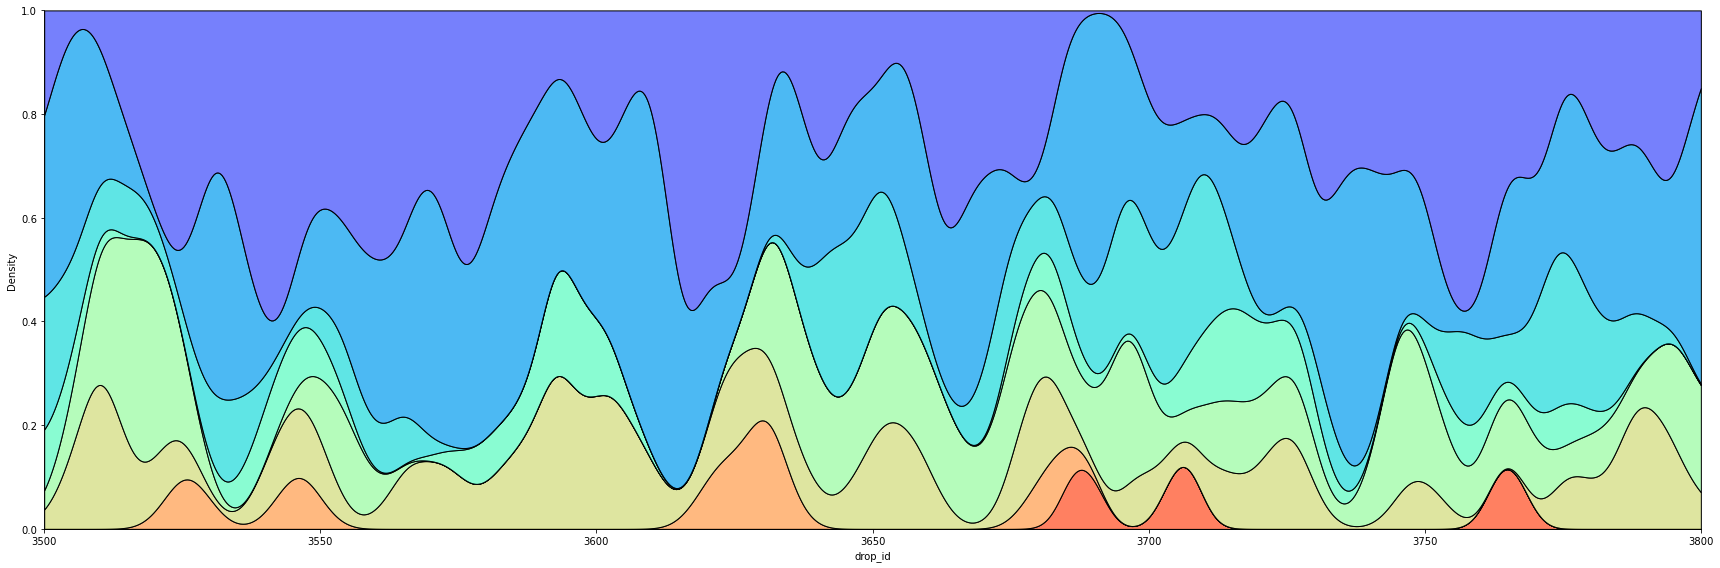

In [32]:
# rolling_avg_topics = topics.rolling(window=150).mean()

sns.displot(topic_coincidences, x='drop_id', hue='topic', kind='kde', height=2, aspect=8, bw_adjust=0.05, gridsize=1000, cut=0, legend=False)
sns.displot(topic_conspiratorial, x='drop_id', hue='topic', kind='kde', height=2, aspect=8, bw_adjust=0.05, gridsize=1000, cut=0, legend=False)
sns.displot(topic_jpeg, x='drop_id', hue='topic', kind='kde', height=2, aspect=8, bw_adjust=0.05, gridsize=1000, cut=0, legend=False)
sns.displot(topic_png, x='drop_id', hue='topic', kind='kde', height=2, aspect=8, bw_adjust=0.05, gridsize=1000, cut=0, legend=False)
sns.displot(topic_twitter, x='drop_id', hue='topic', kind='kde', height=2, aspect=8, bw_adjust=0.05, gridsize=1000, cut=0, legend=False)
sns.displot(topic_other, x='drop_id', hue='topic', kind='kde', height=2, aspect=8, bw_adjust=0.05, gridsize=1000, cut=0, legend=False)
sns.displot(topic_sloganeering, x='drop_id', hue='topic', kind='kde', height=2, aspect=8, bw_adjust=0.05, gridsize=1000, cut=0, legend=False)
sns.displot(topic_patriotism, x='drop_id', hue='topic', kind='kde', height=2, aspect=8, bw_adjust=0.05, gridsize=1000, cut=0, legend=False)

sns.displot(df, x='drop_id', hue='tripcode', multiple='fill', kind='kde', height=2, aspect=8, bw_adjust=0.1, gridsize=1000, cut=0, legend=True)
sns.displot(df, x='drop_id', hue='topic', cumulative=False, kind='kde', multiple='fill', height=8, aspect=3, bw_adjust=0.05, gridsize=1000, cut=0, legend=True)

posts_150_to_650 = df[149:650]
sns.displot(posts_150_to_650, x='drop_id', hue='tripcode', multiple='fill', kind='kde', height=2, aspect=8, bw_adjust=0.1, gridsize=1000, cut=0, legend=False)
sns.displot(posts_150_to_650, x='drop_id', hue='topic', kind='kde', multiple='fill', height=8, aspect=3, bw_adjust=0.1, gridsize=1000, cut=0, legend=False)


posts_1750_to_1900 = df[1749:1900]
topic_conspiratorial = posts_1750_to_1900[posts_1750_to_1900.topic == 'Conspiratorial']
sns.displot(posts_1750_to_1900, x='drop_id', hue='tripcode', multiple='fill', kind='kde', height=2, aspect=8, bw_adjust=0.1, gridsize=1000, cut=0, legend=True)
sns.displot(topic_conspiratorial, x='drop_id', hue='topic', kind='kde', height=2, aspect=8, bw_adjust=0.05, gridsize=1000, cut=0, legend=False)
sns.displot(posts_1750_to_1900, x='drop_id', hue='topic', kind='kde', multiple='fill', height=8, aspect=3, bw_adjust=0.1, gridsize=1000, cut=0, legend=True)

posts_3500_to_3800 = df[3499:3800]
topic_conspiratorial = posts_3500_to_3800[posts_3500_to_3800.topic == 'Conspiratorial']
sns.displot(posts_3500_to_3800, x='drop_id', hue='tripcode', multiple='fill', kind='kde', height=2, aspect=8, bw_adjust=0.1, gridsize=1000, cut=0, legend=False)
sns.displot(topic_conspiratorial, x='drop_id', hue='topic', kind='kde', height=2, aspect=8, bw_adjust=0.05, gridsize=1000, cut=0, legend=False)
sns.displot(posts_3500_to_3800, x='drop_id', hue='topic', kind='kde', multiple='fill', height=8, aspect=3, bw_adjust=0.1, gridsize=1000, cut=0, legend=False)

In [33]:
tripcodes = df.tripcode.unique()
total_drops = len(df)

top_8_Qs = []

for tripcode in tripcodes:
    if (len(df[df.tripcode == tripcode]) / total_drops * 100) > 1:
        top_8_Qs.append(tripcode)

for tripcode in top_8_Qs:
    all_posts_by_tripcode = df[df.tripcode == tripcode]
    uppercase_posts = all_posts_by_tripcode[all_posts_by_tripcode.is_uppercase]
    pct_uppercase = len(uppercase_posts) / len(all_posts_by_tripcode)
    print('{0}\t{1:.2%} uppercase'.format(tripcode, pct_uppercase))

Anonymous	1.23% uppercase
Q !ITPb.qbhqo	2.69% uppercase
Q !UW.yye1fxo	6.17% uppercase
Q !xowAT4Z3VQ	3.13% uppercase
Q !4pRcUA0lBE	1.06% uppercase
Q !CbboFOtcZs	1.00% uppercase
Q !!mG7VJxZNCI	3.06% uppercase
Q !!Hs1Jq13jV6	1.90% uppercase


Text(0, 0.5, 'Board')

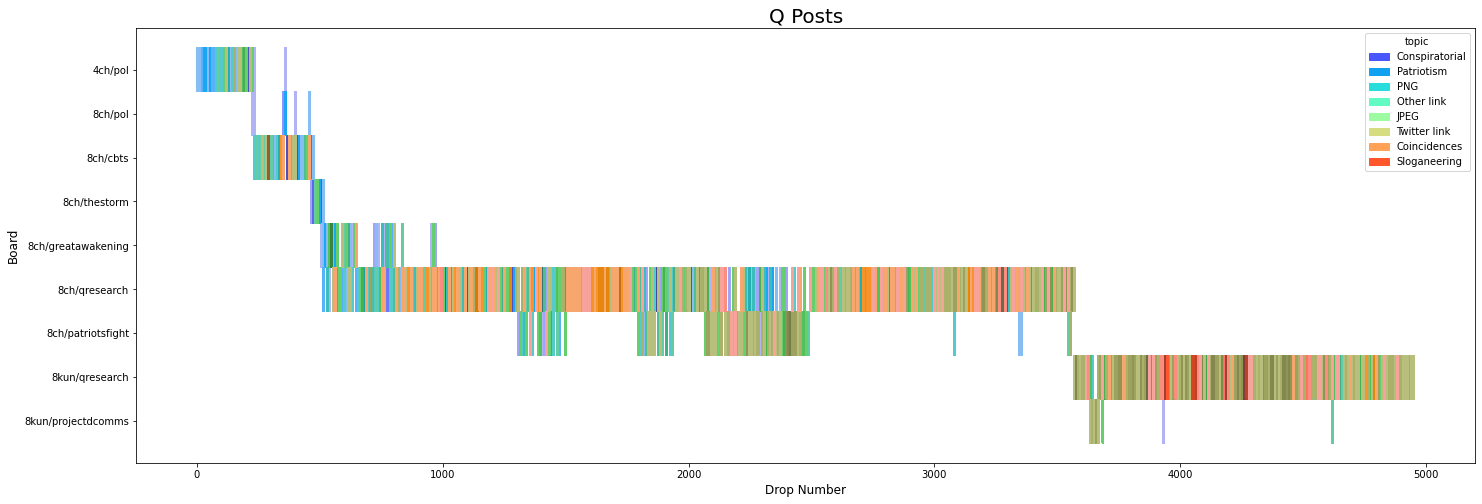

In [34]:
#sns.jointplot(data=df, x='drop_id', y='topic', kind='hist')
sns.color_palette("rainbow", 8)

fig = plt.gcf()
fig.set_size_inches(24, 8)
sns.set_palette("rainbow", 8)
sns.histplot(data=df, x='drop_id', y='board', hue='topic', bins=600).set_title('Q Posts', size=20)

fig.set_size_inches(24, 8)
plt.xlabel("Drop Number", size=12)
plt.ylabel("Board", size=12)



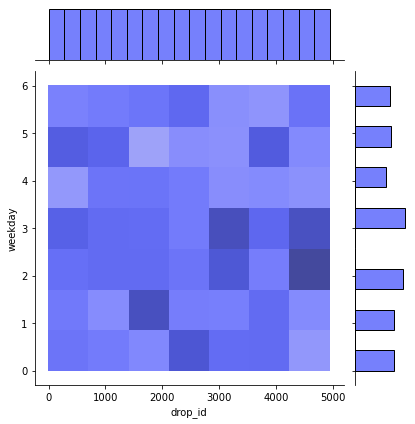

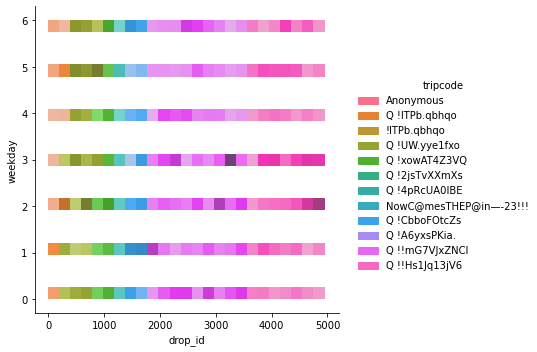

In [35]:
sns.jointplot(data=df, x='drop_id', y='weekday', bins=7, kind='hist')
sns.displot(data=df, x='drop_id', y='weekday', hue='tripcode', bins=25)

In [44]:
q_replies = df[df.is_reply]
q_replies

,date,tripcode,board,time,hour,hour_utc,time_utc,minutes_since_last_drop,minutes_since_last_drop_avg,post_length_chars,weekday,is_uppercase,topic,is_reply
drop_id,,,,,,,,,,,,,,
1,2017-10-28 13:44:28-07:00,Anonymous,4ch/pol,13:44:28,13.733333,20.733333,20:44:28,NaN,NaN,521,5,False,Conspiratorial,True
28,2017-10-31 22:59:01-07:00,Anonymous,4ch/pol,22:59:01,22.983333,5.983333,05:59:01,2.916667,9.430000,1896,1,False,Conspiratorial,True
51,2017-11-02 11:12:06-07:00,Anonymous,4ch/pol,11:12:06,11.200000,18.200000,18:12:06,5.133333,14.956667,1746,3,False,Patriotism,True
58,2017-11-02 13:40:27-07:00,Anonymous,4ch/pol,13:40:27,13.666667,20.666667,20:40:27,0.816667,24.806667,2013,3,False,Conspiratorial,True
66,2017-11-02 17:19:28-07:00,Anonymous,4ch/pol,17:19:28,17.316667,0.316667,00:19:28,12.166667,14.313333,487,3,False,Conspiratorial,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4877,2020-10-15 14:33:19-07:00,Q !!Hs1Jq13jV6,8kun/qresearch,14:33:19,14.550000,21.550000,21:33:19,0.616667,62.200000,24,3,False,JPEG,True
4878,2020-10-15 14:54:41-07:00,Q !!Hs1Jq13jV6,8kun/qresearch,14:54:41,14.900000,21.900000,21:54:41,21.366667,61.183333,91,3,False,JPEG,True
4879,2020-10-15 14:56:51-07:00,Q !!Hs1Jq13jV6,8kun/qresearch,14:56:51,14.933333,21.933333,21:56:51,2.166667,45.016667,505,3,False,PNG,True


In [45]:
from datetime import datetime
import pytz

tz = pytz.timezone('America/Los_Angeles')

daylight_savings_1 = df[df.date >= datetime.fromisoformat('2019-02-10').astimezone(tz)]
daylight_savings_1 = daylight_savings_1[daylight_savings_1.date <= datetime.fromisoformat('2019-04-10').astimezone(tz)]

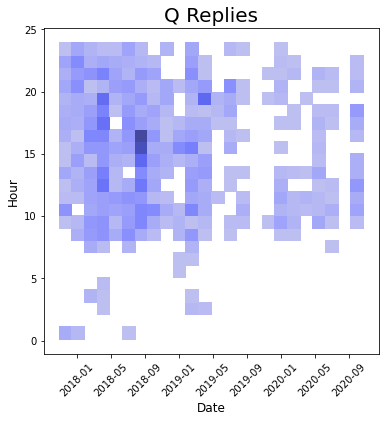

ValueError: Tz-aware datetime.datetime cannot be converted to datetime64 unless utc=True

In [49]:
plt.figure(figsize=(6,6))
sns.histplot(data=q_replies, x='date', y='hour', bins=24).set_title('Q Replies', size=20)
plt.xticks(rotation=45)
plt.xlabel("Date", size=12)
plt.ylabel("Hour", size=12)
plt.show()

q_replies['minutes_since_last_reply'] = pd.to_datetime(q_replies.date).diff().dt.total_seconds() / 60
q_replies_with_30_minutes = q_replies[q_replies['minutes_since_last_reply'] <= 5]

plt.figure(figsize=(7,6))
sns.histplot(data=q_replies_with_30_minutes, x='date', y='hour', bins=24, cbar=True).set_title('Q Replies within 5 minutes', size=20)
plt.xticks(rotation=45)
plt.xlabel("Date", size=12)
plt.ylabel("Hour", size=12)
plt.show()

plt.figure(figsize=(7,6))
sns.histplot(data=daylight_savings_1, x='date', y='hour_utc', bins=24, cbar=True).set_title('Q Posts', size=20)
plt.xticks(rotation=45)
plt.xlabel("Date", size=12)
plt.ylabel("Hour (UTC)", size=12)
plt.show()

fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(12, 12)
plt.xticks(rotation=45)

sns.scatterplot(data=daylight_savings_1, x='date', y='hour_utc').set_title('Q Posts, 2/10 2019 through 4/10 2019', size=20)
plt.xlabel("Date", size=12)
plt.ylabel("Hour (UTC)", size=12)

fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(24, 16)
plt.xticks(rotation=45)

sns.scatterplot(data=df, x='date', y='hour_utc', hue='tripcode').set_title('Q Posts', size=20)
plt.xlabel("Date", size=12)
plt.ylabel("Hour (UTC)", size=12)
plt.axvline(x=datetime.fromisoformat('2017-11-05'), ls=':', color='red')
plt.axvline(x=datetime.fromisoformat('2018-03-11'), ls=':', color='blue')
plt.axvline(x=datetime.fromisoformat('2018-11-04'), ls=':', color='red')
plt.axvline(x=datetime.fromisoformat('2019-03-10'), ls=':', color='blue')
plt.axvline(x=datetime.fromisoformat('2019-11-03'), ls=':', color='red')
plt.axvline(x=datetime.fromisoformat('2020-03-08'), ls=':', color='blue')
plt.axvline(x=datetime.fromisoformat('2020-11-01'), ls=':', color='red')

In [51]:
# First drop on 8ch: #230
print(df[df.board.str.startswith('8ch')].iloc[0])

# First drop on 8kun: #3571
print(df[df.board.str.startswith('8kun')].iloc[0])

# First drop w/ tripcode !Cbb... #1417
print(df[df.tripcode.str.startswith('Q !Cbb')].iloc[0])

date                           2017-11-25 10:54:45-08:00
tripcode                                   Q !ITPb.qbhqo
board                                            8ch/pol
time                                            10:54:45
hour                                                10.9
hour_utc                                            18.9
time_utc                                        18:54:45
minutes_since_last_drop                          23.9667
minutes_since_last_drop_avg                      438.313
post_length_chars                                     67
weekday                                                5
is_uppercase                                       False
topic                                     Conspiratorial
is_reply                                           False
Name: 230, dtype: object
date                           2019-11-02 12:47:25-07:00
tripcode                                  Q !!mG7VJxZNCI
board                                     8kun/qresearch
time  

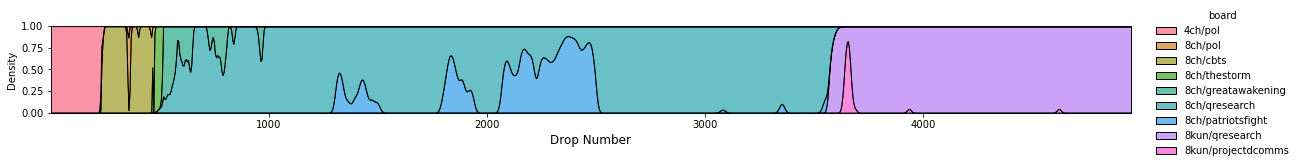

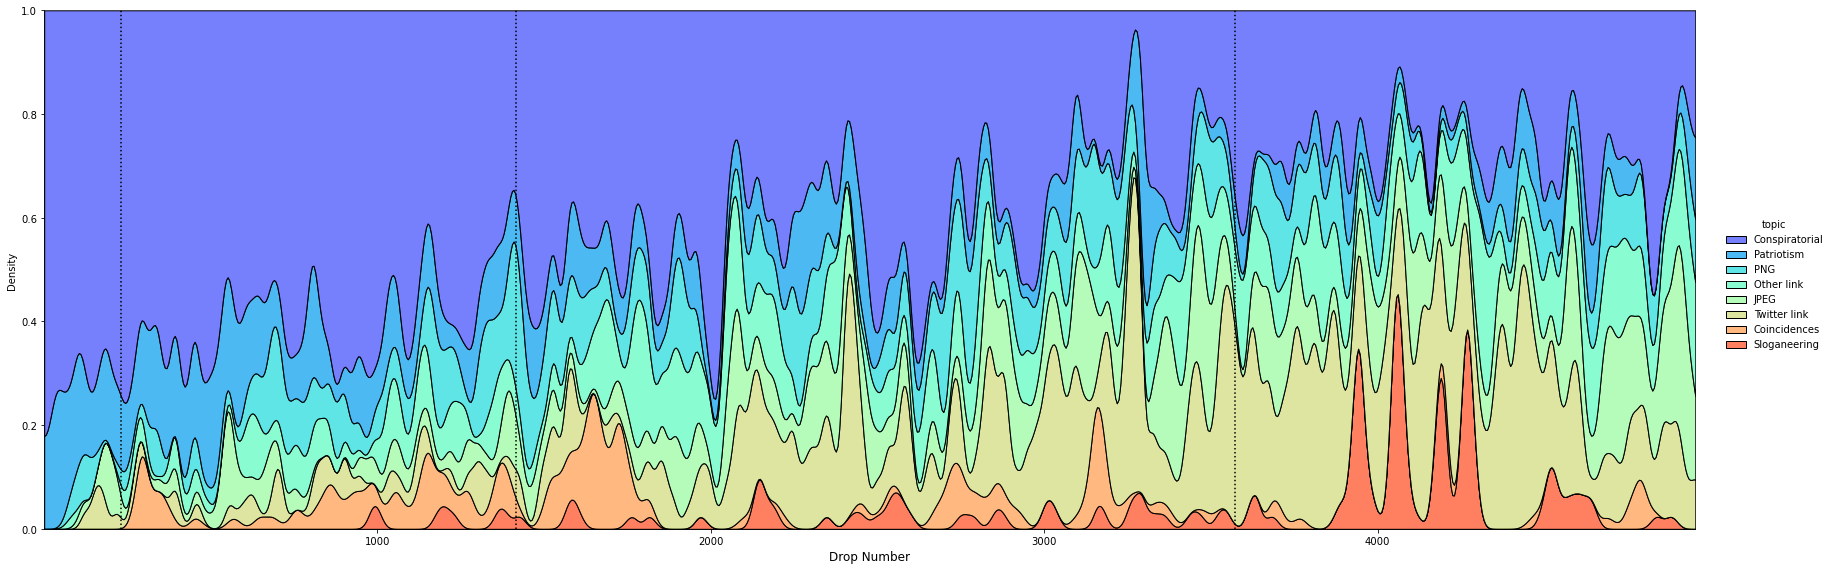

In [53]:
sns.displot(df, x='drop_id', hue='board', multiple='fill', kind='kde', height=2, aspect=8, bw_adjust=0.1, gridsize=1000, cut=0, legend=True)
plt.xlabel("Drop Number", size=12)

sns.displot(df, x='drop_id', hue='topic', cumulative=False, kind='kde', multiple='fill', height=8, aspect=3, bw_adjust=0.05, gridsize=1000, cut=0, legend=True)
plt.xlabel("Drop Number", size=12)

plt.axvline(x=230, ls=':', color='black')
plt.axvline(x=1417, ls=':', color='black')
plt.axvline(x=3571, ls=':', color='black')